In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
#from descartes.patch import PolygonPatch
#import pylab as pl
#import numpy as np


In [3]:
# Shapefile with the streets named after victims
missing_killed = gpd.read_file('../missing_kiled_map_shp/')

In [4]:
# Shapefile with the streets named after criminals
dictatorship_criminals = gpd.read_file('../dictatorship_criminals_map_shp/')

In [5]:
# Selecting a few columns
missing_killed = missing_killed[['geometry','name']]

In [6]:
# Selecting a few columns
dictatorship_criminals = dictatorship_criminals[['geometry','name']]

In [7]:
# Setting code
missing_killed['code'] = '1'

In [8]:
# Setting color
missing_killed['color'] = "#ffa500"

In [9]:
# Setting code
dictatorship_criminals['code'] = '2'

In [10]:
# Setting color
dictatorship_criminals['color'] = '#a500ff'

In [11]:
# Concatenating dataframes
df = pd.concat([missing_killed,dictatorship_criminals]).reset_index()

In [12]:
# Function to get a description based on the street name
def get_desc(row):
    #### VICTIMS
    if 'iara iavelberg' in row['name']:
        desc = '''Psicóloga e professora universitária, participou da resistência armada contra o regime em grupos de extrema-esquerda. 
        Envolveu-se amorosamente com Carlos Lamarca, um dos líderes da Vanguarda Popular Revolucionária (VPR). 
        Foi morta aos 27 anos, em 1971, durante um cerco policial ao apartamento onde morava, em Salvador (BA).'''
    if "luiz vieira" in row['name']:
        desc = '''Camponês que morava na região de São Domingos do Pará (PA), uniu-se à Guerrilha do Araguaia. 
        Foi morto em uma emboscada armada pelo Exército em dezembro de 1973. Seus restos mortais nunca foram entregues aos familiares.'''
    if "josé de oliveira" in row['name']:
        desc = '''Camponês desaparecido durante a Guerrilha do Araguaia, em 1972. Não há mais informações sobre sua biografia.'''
    if "josé de souza" in row['name']:
        desc = '''Mecânico e sindicalista, morreu aos 33 anos, em 17 de abril de 1964. 
        Supostamente, cometeu suicídio atirando-se do terceiro andar do prédio onde estava detido.'''
    if 'josé guimarães' in row['name']:
        desc = '''Estudante paulistano. 
        Aos 20 anos, foi morto a tiros no episódio que ficou conhecido como  "Batalha da Maria Antônia", quando forças policias reprimiram uma manifestação de estudantes no centro de São Paulo, em 3 de outubro de 1968.'''
    if 'manoel alves de oliveira' in row['name']:
        desc = '''Segundo-sargento do Exército, morreu em 8 de maio de 1964, após ser torturado na Escola de Cavalaria do Rio de Janeiro. 
        Tinha 30 anos e cinco filhos.'''
    if 'arildo valadão' in row['name']:
        desc = '''Estudante de física e militante do PCdoB, lutou na Guerrilha do Araguaia. 
        Em 24 de novembro de 1973, companheiros ouviram tiros e logo depois encontraram seu corpo sem a cabeça. Tinha 24 anos.'''
    if 'benedito gonçalves' in row['name']:
        desc = '''Metalúrgico mineiro, foi feriado pela Polícia Militar durante um piquete grevista em 13 de agosto de 1979. 
        Morreu uma semana depois, no dia de seu aniversário de 48 anos.'''
    if 'josé manoel da silva' in row['name']:
        desc = '''Ex-militar, havia sido expulso do Exército ao participar de manifestações contra o Golpe, em 1964. 
        Posteriormente, ingressou no grupo de guerrilha urbana Vanguarda Popular Revolucionária. Foi morto aos 22 anos, em uma emboscada, no dia 9 de janeiro de 1973.'''
    if 'margarida maria alves' in row['name']:
        desc = '''Camponesa, rendeira e sindicalista. Estudou apenas até a quarta série e trabalhava desde os 8 anos. 
        Em 12 de agosto de 1983, foi executada com um tiro no rosto, em frente ao marido e aos filhos. Tinha 51 anos.'''
    if 'carlos lamarca' in row['name']:
        desc = '''Ex-capitão do Exército, aproximou-se da ideologia comunista após o Golpe de 1964. 
        Em 1969, desertou das Forças Armadas e passou a organizar grupos de resistência contra o regime. 
        Arquitetou o sequestro do embaixador da Suiça no Brasil, Giovanni Bucher, entre outras ações, como assaltos a banco. 
        Foi morto em 1971, durante ação do Exército no sertão da Bahia. Junto de um companheiro, fugiu por dias, até ser encontrado enquanto descansava embaixo de uma árvore. Enquanto tentava se levantar para fugir, foi fuzilado.'''
    if 'vladimir herzog' in row['name']:
        desc = '''Jornalista e professor universitário nascido na Iugoslávia, mudou-se para o Brasil no final dos anos 1950.
        Na década de 1970, já com um carreira consolidada de repórter, passou a ser investigado por envolvimento com o Partido Comunista Brasileiro (PCB). 
        Convocado para depor em 25 de outubro de 1975, apresentou-se voluntariamente a uma delegacia. Foi torturado e assassinado. 
        O governo tentou encobrir o caso simulando um suicídio por enforcamento dentro da cela.'''
    if 'josé porfírio de souza' in row['name']:
        desc = '''Líder camponês, membro da Vanguarda Armada Revolucionária Palmares, grupo de resistência armada ao Regime Militar. 
        Depois de sofrer torturas, foi forçado a ingerir veneno e abandonado em uma praça. 
        Morreu aos 57 anos, em 19 de março de 1970. '''
    if 'maurício grabois' in row['name']:
        desc = '''Militante do PCdoB, foi um combatente da Guerrilha do Araguaia no interior do Pará. Desapareceu no Natal de 1973, aos 61 anos.'''
    if 'márcio beck machado' in row['name']:
        desc = '''Universitário, estudava Economia na Universidade Mackenzie, em São Paulo. 
        Recebeu treinamento militar em Cuba e voltou clandestinamente ao Brasil, onde fez parte do Movimento de Libertação Popular (Molipo), dissidência da Ação Libertadora Nacional, grupo de guerrilha urbana de Carlos Marighella.. 
        Foi executado a tiros em 17 de maio de 1973, aos 30 anos.'''
    if 'francisco josé de oliveira' in row['name']:
        desc = '''Estudante de Ciências Sociais da USP conhecido como "Chico Dialético", recebeu treinamento de guerrilha em Cuba. 
        Voltou ao Brasil em 1971. Morreu aos 28 anos, em 5 de novembro de 1971, depois de levar tiros a queima roupa da polícia enquanto comia em uma lanchonete.'''
    if 'josé sabino' in row['name']:
        desc = '''Participava de uma manifestação estudantil no Rio de Janeiro quando levou o que o matou. Detalhes sobre sua biografia são desconhecidos.'''
    if 'paulo stuart wright' in row['name']:
        desc = '''Sociólogo, foi levado para o DOI-CODI, em São Paulo, em setembro de 1973. Nunca mais foi visto. Tinha 40 anos.'''
    if 'carlos marighella' in row['name']:
        desc = '''Ex-deputado federal, já havia sido perseguido pelo Estado Novo de Getúlio Vargas. 
        Após o golpe de 1964, fundou o grupo de resistência Ação Libertadora Nacional (ALN) e tornou-se a principal liderança na luta armada contra a Ditadura. 
        Em novembro de 1969, após a captura e tortura de alguns de seus aliados, foi emboscado na Alameda Casa Branca, em São Paulo, e morto a tiros. Estava desarmado.'''
    if 'joão batista rita' in row['name']:
        desc = '''Estudante, participou de guerrilha urbana no Rio Grande do Sul. Foi banido do país em 1971. 
        Viveu no Chile e, posteriormente, na Argentina. Desapareceu poucos dias depois de casar, em Buenos Aires, em dezembro de 1973.'''
    if 'orlando momente' in row['name']:
        desc = '''Filiado ao PCdoB, tentou organizar guerrilhas no interior de Goiás e do Pará. Morreu durante ação do Exército no Natal de 1974. Tinha 41 anos. '''
    if 'pedro inácio de araújo' in row['name']:
        desc = '''Líder camponês vinculado ao PCB, desapareceu na cidade de João Pessoa (PB) em setembro de 1964, depois de  ser preso e torturado por agentes do Exército. Tinha 55 anos.'''
    if 'raimundo ferreira lima' in row['name']:
        desc = '''Conhecido como "Gringo", foi um líder sindical paraense, lavrador e Membro da Pastoral da Terra. Morreu em 29 de maio de 1980, aos 42 anos, em Araguaína (TO). 
        Foi sequestrado durante a noite, levado até uma estrada, torturado e executado com dois tiros nas costas.'''
    if 'miguel pereira dos santos' in row['name']:
        desc = '''Bancário e militante do PCdoB. Foi para a China em meados dos anos 60, onde estudou táticas de guerrilha. 
        Ao retornar ao Brasil, participou da Guerrilha do Araguaia, onde foi morto entre setembro e outubro de 1972.'''
    if 'josé soares dos santos' in row['name']:
        desc = '''Mecânico, participou da Guerrilha de Três Passos, um movimento de resistência que eclodiu pouco antes do aniversário de um ano do golpe, em 1965. Foi assassinado por policiais no início de 1977, aos 25 anos. Seu corpo foi encontrado em uma estrada próxima ao Parque Nacional do Iguaçu (PR), mutilado, com os olhos perfurados e castrado.'''
    if 'elson costa' in row['name']:
        desc = '''Jornalista, era militante do PCB e perseguido desde a época do Estado Novo. 
        Foi detido em um bar no bairro de Santo Amaro, em São Paulo, no dia 15 da janeiro de 1975. Nunca mais foi visto. 
        De acordo com uma entrevista do ex-sargento Marival Chaves para a revista Veja, publicada em 1992, militares atearam fogo ao corpo de Elton e o executaram com uma "injeção para matar cavalo".'''
    if 'josé campos barreto' in row['name']:
        desc = '''Conhecido como "Zequinha", foi um metalúrgico e sindicalista que participou de greves em São Paulo e ajudou Carlos Lamarca a organizar um foco guerrilheiro no interior do Bahia. 
        Foi emboscado e assassinado junto com Lamarca enquanto descansavam sob uma árvore após passar dias fugindo do Exército.'''
    if 'dorival ferreira' in row['name']:
        desc = '''Líder sindical e militante da Ação Libertadora Nacional (ALN), morreu aos 38 anos, em 29 de fevereiro de 1996. 
        Foi baleado dentro da própria casa, em Osasco (SP). Mesmo ferido, foi preso e executado.'''
    if 'joão bosco penido burnier' in row['name']:
        desc = '''Sacerdote membro do Conselho Indigenista Missionário, foi morto com dois tiros na cabeça dentro de uma delegacia na região de Ribeirão Cascalheira (MT). 
        Ele fora ao local protestrar contra a detenção e tortura de outras três pessoas. Tinha 59 anos.'''
    if 'joão carlos haas sobrinho' in row['name']:
        desc = '''Médico filiado ao PCdoB, foi perseguido após o Golpe de 64 e entrou para a clandestinidade. 
        Posteriormente, foi para a China estudar táticas de guerrilha. Retornou ao Brasil em 1968 e montou um pequeno hospital no interior do Amazonas. 
        Acusado erroneamente de participação em um assalto, voltou a aproximar-se da resistência armada e participou da Guerrilha do Araguaia, na qual atuou como médico. 
        Desapareceu em setembro de 1972.'''
    if 'joão pedro teixeira' in row['name']:
        desc = '''Líder da Liga Camponesa - grupos de trabalhadores que defendiam a Reforma Agrária - de Sapé, na Paraíba, foi executado por pistoleiros e militares no dia 2 de abril de 1962. 
        Em 1965, o regime militar inocentou os responsáveis pelo crime, que haviam sido considerados culpados por uma CPI da Assembléia Legislativa da Paraíba.'''
    if 'gilberto olímpio maria' in row['name']:
        desc = '''Jornalista de Mirassol (SP), militou pelo PCB e pelo PCdoB. Depois de receber treinamento na China, voltou ao Brasil e participou da Guerrilha do Araguaia. Foi morto pelo Exército no Natal de 1973.'''
    if 'lyda monteiro da silva' in row['name']:
        desc = '''Secretária da Comissão de Direitos Humanos da Ordem dos Advogados do Brasil, morreu em um atentado promovido por agentes de inteligência do Exército. 
        Ela abriu uma carta-bomba na sede da entidade no Rio de Janeiro, em 27 de agosto de 1980. Tinha 60 anos.'''
    if 'osvaldo orlando da costa' in row['name']:
        desc = '''Antes de se tornar militante do PCdoB, "Osvaldão" foi lutador de boxe. Chegou a vencer o campeonato carioca da modalidade pelo Botafogo. 
        Estudou Engenharia na Tcheoslováquia, ainda antes do Golpe Militar. Em 1964, foi para a China a serviço do partido, onde teve contato com táticas de guerrilha. 
        Retoronou para o Brasil e, desde 1966, morou na região do Araguaia, onde particiou da Guerrilha e foi morto no início de 1974.'''
    if 'josé manoel da silva' in row['name']:
        desc = '''Cabo da Marinha, foi expulso da corporação por participar da Revolta dos Marinheiros de 1964 - episódio em que marinheiros comemoravam o aniversário de dois anos de uma associação de classe, considerada ilegal pelos superiores. 
        Entrou em contato com a Vanguarda Popular Revolucionária e passou a dar suporte para ações da guerrilha no nordeste. Foi preso e morto em janeiro de 1973.'''
    if 'josé humberto bronca' in row['name']:
        desc = '''Operário na companhia aérea Varig, era militante do PCdoB. 
        Após o Golpe de 1964, saiu do país e recebeu treinamento na China. 
        Voltou ao Brasil e em 1969 foi para a Guerrilha do Araguaia, onde participou como vice-comandante de destacamento.
        Desapareceu em 1974, próximo a cidade de Palestina (PA).'''
    if 'josé montenegro de lima' in row['name']:
        desc = '''Líder estudantil e militante do PCB no Ceará. 
        Após o Golpe, mudou-se para São Paulo no intuito de fugir da perseguição que sofria em seu Estado. 
        Desapareceu entre 29 e 30 de setembro de 1975, aos 27 anos. 
        De acordo com depoimento do ex-sargento Marival Chaves, foi morto ao receber uma injeção para cavalos em um centro de tortura clandestino localizado em Itapevi (SP).'''
    if 'frazão soares' in row['name']:
        desc = '''Funcionário público, militou nos grupos de esquerda Juventude Universitária Católica (JUC) e Ação Popular (AP). 
        Em 1965 foi preso e torturado por ter liderado a resistência dos estudantes de Engenharia da UFPE. Em novembro de 1966, foi condenado a dois anos de reclusão acusado de “agitação na classe universitária”. 
        Desapareceu em 27 de maio 1974, Petrolina (PE).'''
    if 'santo dias da silva' in row['name']:
        desc = '''Operário, foi membro da Pastoral Operária da Zona Sul de São Paulo, das Comunidades de Base de Vila Remo e integrante do Comitê Brasileiro pela Anistia. 
        Foi assassinado durante uma manifestação sindical, em 30 de outubro de 1979. Após sua morte, para homenageá-lo, foi criado o Centro Santo Dias de Direitos Humanos da Arquidiocese de São Paulo.'''
    if 'sérgio landulfo furtado' in row['name']:
        desc = '''Estudante, participou do Movimento Revolucionário 8 de Outubro (MR-8). 
        Em 1969 passou a viver clandestinamente. Desapareceu em 11 de julho de 1972, Rio de Janeiro (RJ).'''
    if 'raimundo gonçalves figueiredo' in row['name']:
        desc = '''Bancário, participava da Juventude Operária Católica (JOC) e tentou criar um sindicato. 
        Ingressou na organização de esquerda católica Ação Popular e também participou da Vanguarda Armada Revolucionária Palmares (VAR-Palmares). 
        Desapareceu em 27 de abril de 1971, em Recife (PE), após ser baleado e preso por homens do DOPS.'''
    if 'josé milton barbosa' in row['name']:
        desc = '''Ex-militar, foi cassado após a deposição de João Goulart, em 1964. 
        Era acusado de envolvimento no sequestro do embaixador alemão Von Holleben e na execução do empresário industrial Albert Henning Boilesen. 
        Foi morto em 5 de dezembro de 1971 no DOI-CODI do II Exército, em São Paulo (SP).'''
    if 'ivan mota dias' in row['name']:
        desc = '''Estudante, participou da Vanguarda Popular Revolucionária (VPR). 
        Foi um dos 700 estudantes presos em 1968, no Congresso clandestino da UNE que foi interrompido por militares.
        Foi libertado, mas passou a viver na clandestinidade diante de novo pedido de prisão. 
        Capturado por agentes do Centro de Informações da Aeronáutica (CISA) em 15 de maio de 1971, desde então sua família não teve mais notícias de seu paradeiro.'''
    if 'bergson gurjão farias' in row['name']:
        desc = '''Estudante, foi preso em  em outubro de 1968, durante o Congresso da UNE em Ibiúna (SP) que foi interrompido por militares. 
        Em julho de 1969, foi condenado a dois anos de reclusão pela Justiça Militar. Para fugir, mudou-se para a região de Caianos, no sudeste do Pará.
        Segundo os presos políticos sobreviventes José Genoíno e Dower Moraes Cavalcante, Bergson desapareceu em meados de 1972, após ser torturado.'''
    if 'ezequias bezerra da rocha' in row['name']:
        desc = "Geólogo e simpatizante comunista, não era membro de partidos. Foi preso e desapareceu em março de 1972, durante uma viagem para Salvador (BA). Lá, pretendia fazer pós-graduação em geofísica. Tinha 28 anos."
    if 'ieda santos delgado' in row['name']:
        desc = "Desapareceu aos 29 anos, durante viagem de São Paulo para o Rio de Janeiro em que cumpria tarefas da Ação Libertadora Nacional (ALN), grupo de resistência armada em que militava."
    if 'luiz gonzaga dos santos' in row['name']:
        desc = '''Vice-prefeito de Natal (RN), foi preso e cassado nos primeiros dias após o Golpe de 1964. 
        Passou um mês preso, entre agosto e setembro de 1967, quando foi internado em um hospital de Recife (PE). 
        Morreu devido à tortura e maus-tratos que recebeu no cárcere.'''
    if 'arnaldo cardoso rocha' in row['name']:
        desc = "Ex-soldado do Exército, tornou-se militante da Aliança Nacional Libertadora (ALN) e morreu em 15 de março de 1973. De acordo com registros dos órgãos de repressão, ele trocou tiros com a polícia. Novo laudo médico, porém revelou marcas típicas de tortura e execução."
    if 'josé toledo de oliveira' in row['name']:
        desc = "Bancário mineiro radicado no Rio de Jarneiro, era editor de um jornal de esquerda e filiado ao PCdoB. Foi preso duas vezes entre 1968 e 1969. No começo de 1970, juntou-se à guerrilha no interior do Pará, onde foi morto em setembro de 1972."
    if 'frederico eduardo mayr' in row['name']:
        desc = '''Estudava arquitetura na UFRJ quando juntou-se à guerrilha urbana da ALN. Viveu na clandestinidade e fez treinamento militar em Cuba.
        Voltou ao Brasil em 1971. Em fevereiro do ano seguinte, foi baleado, preso e torturado com choques elétricos e no pau de arara. 
        Depois de morto, foi enterrado como indigente.'''
    if 'eduardo collier filho' in row['name']:
        desc = '''Estudante de direito da UFBA, foi detido durante o Congresso clandestino da UNE, em 1968, e expulso da universidade no ano seguinte.
        Preso no Rio de Janeiro em fevereiro de 1974, está desaparecido desde então.'''
    if 'lourdes maria wanderley pontes' in row['name']:
        desc = '''Estudante e militante do Partido Comunista Brasileiro Revolucionário (PCBR). 
        Em 1972, foi morta por forças do estado em circunstâncias controversas, com possível execução, aos 29 anos. 
        Foi enterrada como indigente.'''
    if 'joaquim pires cerveira' in row['name']:
        desc = '''Ex-militar e vereador de Curitiba, teve os direitos políticos cassados após o Golpe. 
        Nos anos 1970, entrou para a Frente de Libertação Nacional (FLN), quando foi preso e torturado. 
        Exilado, viveu na Argélia e na Argentina. Desapareceu em Buenos Aires em dezembro de 1973. 
        Há indícios de que tenha sido levado para o Brasil e morrido durante sessões de tortura.'''
    if 'josé roberto arantes de almeida' in row['name']:
        desc = '''Estudava no Instituto de Tecnologia Aeronáutica (ITA), mas foi expulso após o Golpe, em 1964. 
        Entrou na USP três anos depois, onde cursou filosofia. 
        Foi preso durante o Congresso clandestino da UNE em 1968, mas conseguiu escapar e juntou-se à resistência contra o Regime Militar. 
        Recebeu treinamento militar em Cuba, em 1969. 
        Depois de voltar para o país, foi capturado e torturado até a morte no DOI-CODI de São Paulo, em 1971, com 28 anos.'''
    if 'guido leão' in row['name']:
        desc = '''Metalúrgico, foi atropelado pela polícia durante a repressão a um piquete de greve em Betim (MG). 
        Morreu em 27 de setembro de 1979, aos 23 anos.'''
    if 'maria augusta thomaz' in row['name']:
        desc =  'Estudante de filosofia da PUC-SP, foi presa no Congresso da UNE de 1968. Depois que seu namorado, que participava da ALN de Carlos Marighella, foi fuzilado, ela entrou para a clandestinidade. Foi acusada de participar do sequestro de um avião da Varig, que foi levado para Cuba. Recebeu treinamento militar na ilha comunista e voltou ao Brasil em 1971. Foi executada em 4 de maio de 1973, aos 26 anos. O caseiro da casa onde ele estava, em Rio Verde (GO), conta ter sido obrigado a enterrar o corpo.'''
    if 'reinaldo silveira pimenta' in row['name']:
        desc = '''Estudante de engenharia, participou do Movimento Revolucionário 8 de Outubro. 
        Aos 24 anos, foi emboscado por policiais e jogado da janela de seu apartamento no Rio de Janeiro (RJ), em 27 de junho de 1969. 
        Na época, o DOPS alegou que ele teria cometido suicídio.'''
    if 'ramires maranhão do vale' in row['name']:
        desc = '''Estudante secundarista, foi preso pela primeira vez em 1967, aos 17 anos, por protestar contra reformas no sistema de ensino. 
        Líderou passeatas estudantis e participou da resistência contra a invasão do campus da PUC-PE em 1968. 
        Perseguido e proibido de se matricular em qualquer escola, juntou-se ao Partido Comunista Brasileiro Revolucionário (PCBR). 
        Morreu aos 22 anos, em outubro de 1973, carbonizado dentro de um carro junto de três companheiros.'''
    if 'santo dias da silva' in row['name']:
        desc = '''Líder sindical operário, foi morto a tiros por um policial durante um piquete de greve no bairro de Santo Amaro, São Paulo (SP), em 30 de outubro de 1979. Tinha 37 anos.'''
    if 'daniel josé de carvalho' in row['name']:
        desc = '''Trabalhou como motorista e torneiro mecânico na região do ABC Paulista. Ele e seus três irmãos eram militantes comunistas. 
        Foi exilado, primeiramente no Chile, e depois na Argentina. 
        Entrou na Vanguarda Popular Revolucionária (VPR) quando estava no país platino. 
        Foi emboscado e morto por homens do Regime poucos dias depois de cruzar a fronteira brasileira, no Parque Nacional do Iguaçu (PR), em julho de 1974. 
        Tinha 29 anos.'''
    if 'maria regina marcondes pinto' in row['name']:
        desc = '''Na virada de 1969 para 1970, estava em Paris e planejava voltar para o Brasil quando seis militantes foram presos, o que a fez desistir da ideia. Foi então para Santiago do Chile e, depois, para a Argentina, onde se uniu ao Movimiento de Izquierda Revolucionária (MIR). 
        Desapareceu nas ruas de Buenos Aires em abril de 1976.'''
    if 'rodolfo de carvalho troiano' in row['name']:
        desc = '''Líder estudantil secundarista e militante comunista. Foi preso e posto em liberdade diversas vezes, por ser considerado subversivo. 
        Em 1970, mudou-se para o Pará, onde se juntou à Guerrilha do Araguaia. 
        Desapareceu em data incerta, entre 1973 e 1974.'''
    if 'manoel rodrigues ferreira' in row['name']:
        desc = '''Estudante, trabalhava também como vendedor. Foi morto aos 18 anos, quando a polícia do Rio de Janeiro atirou contra um protesto. 
        Levou dois tiros na cabeça enquanto tentava socorrer feridos, em 5 de agosto de 1968.'''
    if 'virgílio gomes da silva' in row['name']:
        desc = '''Operário, sindicalista e comunista, for preso por quatro meses em 1964. 
        Mesmo depois de solto, continuou sendo perseguido e aproximou-se da ALN de Carlos Marighella. 
        Recebeu treinamento de guerrilha em Cuba e comandou o sequestro do embaixador dos EUA no Brasil, Charles Burke Elbrick, que foi trocado pela libertação de quinze presos políticos, em setembro de 1969. 
        No mesmo mês, foi preso e morto sob tortura, aos 36 anos.'''
    if 'raimundo eduardo da silva' in row['name']:
        desc = '''Metalúrgico e líder comunitário do bairro Jardim Zaíra, em Mauá, na grande São Paulo. Organizou grupos de resistência contra o regime e atuou na Ação Popular, grupo da esquerda cristã. 
        Foi morto sob tortura aos 22 anos, em janeiro de 1971.'''
    if 'manoel lisboa de moura' in row['name']:
        desc = '''Um dos fundadores do Partido Comunista Revolucionário (PCR), foi perseguido desde os primeiros dias do Regime Militar. 
        Depois de ser preso em meados da década de 1960, entou para a clandestinidade. Foi torturado até a morte em setembro de 1973.'''
    if 'alceri maria gomes da silva' in row['name']:
        desc = '''Metalúrgica, participou da Vanguarda Popular Revolucionária (VPR). Foi morta em maio de 1970. 
        Existem informações divergentes sobre as circunstâncias de sua morte: ou foi executada a tiros em ação de repressão DOPS ou morreu já depois de presa, sob tortura.'''
    if 'alvino ferreira felipe' in row['name']:
        desc =  'Operário da siderúrgica Usiminas, de Ipatinga (MG), foi morto quando a polícia mineira usou uma metralhadora girtarória para atirar contra manifestantes e sindicalistas que se reuniam em protesto na frente da empresa, em 7 de outubro de 1963. Após o golpe de 1964, todos os policiais envolvidos no caso foram absolvidos pela Justiça Militar.'''
    if 'itair josé veloso' in row['name']:
        desc = '''Comunista desde os anos 1950, liderou delegações sindicais brasileiras que foram à China e à URSS durante o governo João Goulart. Perseguido desde os primeiros dias do Golpe de 1964, entrou para a clandestinidade. Desapareceu em maio de 1975. De acordo com depoimento do ex-sargento Marival Chaves para a revsita Veja, ele teria morrido sob tortura em Itapevi (SP). Seu corpo foi jogado no Rio Avaré.'''
    if 'elmo corrêa' in row['name']:
        desc = '''Estudou até o terceiro ano do curso de Medicina na Escola de Medicina e Cirurgia do Rio de Janeiro. 
        Em 1971, juntou-se à Guerrilha do Araguaia. Foi morto entre 1973 e 1974.'''
    if 'joaquim câmara ferreira' in row['name']:
        desc = '''Militante do PCB desde os anos 1930, foi perseguido já durante o Estado Novo de Getúlio Vargas. Depois do Golpe de 1964, entrou para a clandestinidade e se envolveu na fundação da ALN. Era considerado o segundo em comando da organização, atrás de Carlos Marighella. Organizou o sequestro do embaixador dos EUA no Brasil, Charles Burke Elbrick. Depois da morte de Marighella, passou a liderar a ALN. Foi preso e morto sob tortura em 1970.'''
    if 'eremias delizoicov' in row['name']:
        desc =  'Envolvido com política desde a adolescência, quando foi líder secundarista, envolveu-se com a Vanguarda Popular Revolucuinária (VPR). Foi morto dem 16 de outubro de 1969, em circunstâncias controversas. Investigações da Comissão Nacional da Verdade colocam em xeque os laudos periciais da época, que indicvam troca de tiros entre ele e agentes do estado.'''
    if 'antonio ferreira pinto' in row['name']:
        desc = '''Alfaia-te, participava de movimentos sindicais já antes do Golpe de 1964. 
        Perseguido por ser comunista, mudou-se para o sul do Pará.
        Lá, juntou-se à Guerrilha do Araguaia e foi visto pela última vez durante um tiroteio em 14 de janeiro de 1974.'''
    if 'fernando augusto da fonseca' in row['name']:
        desc = '''Bancário, formado em economia pela UFRJ, foi dirigente do Partido Comunista Revolucionário Brasileiro (PCBR). 
        Para fugir da crescente repressão contra sua organização no começo dos anos 1970, se mudou para Maceió (AL). 
        Mesmo assim, foi capturado e morto em dezembro de 1972. Seu corpo foi encontrado carbonizado dentro de um carro, no Rio de Janeiro (RJ).'''
    if 'flávio carvalho molina' in row['name']:
        desc = '''Estudante de química da UFRJ, foi preso ao participar de manifestações estudantis em 1968. Participou da ALN e do Movimento de Libertação Popular (Molipo).
        Entrou na clandestinidade e saiu do país, exilando-se no Uruguai e em Cuba. Voltou ao Brasil em 1971, mesmo ano em que foi levado para o DOI-CODI de São Paulo e morto, aos 23. '''
    if 'andré grabois' in row['name']:
        desc = '''Filho de antigo líder do PCB, foi obrigado a abandonar os estudos aos 17 anos, após o Golpe de 1964. Na clandestinidade, viveu na China e na Albânia até voltar para o país em 1967, quando foi instalar uma estrutura de guerrilha no interior do Pará. 
        Com ele, foram o pai, o cunhado e a esposa. Morto em outubro de 1973, aos 29 anos.'''
    if 'tito de alencar lima' in row['name']:
        desc = '''Frei dominicano ligado a movimentos estudantis de esquerda, foi sistematiamente perseguido pelo Regime Militar. Preso e torturado em 1969 e 1970, sofreu espancamentos, choques elétricos e humilhações. 
        Foi solto em troca do embaixador suíço no Brasil, Giovani Enrico Bucher, que havia sido sequestrado pela Vanguarda Popular Revolucionária. Mudou-se para a França, onde viveu com distúrbios psiquiátricos até cometer suicídio, em agosto de 1974, aos 29 anos.'''
    if 'geraldo da rocha gualberto' in row['name']:
        desc = '''Alfaiate, foi baleado nas costas quando a polícia de Minas Gerais atirou indiscriminadamente contra um protesto de operários da siderúrgica Usiminas , em Ipatinga, em sete de outubro de 1963. 
        Com o Golpe de 1964, o Tribunal Militar inocentou os soldados envolvidos no episódio.'''
    if 'eduardo antônio da fonseca' in row['name']:
        desc = '''Foi militante da Ação Libertadora Nacional (ANL), grupo guerrilheiro liderado por Carlos Marighella. Morto em uma emboscada no dia 23 de setembro de 1971, em São Paulo (SP), aos aos 24 anos.'''
    if 'carlos schirmer' in row['name']:
        desc = '''Filho de um engenheiro austríaco, filiou-se ao PCB ainda nos anos 20. Aos 68 anos, em maio de 1964, se negou a ser levado à delegacia para ser interrogado sobre suas atividades políticas. Reagiu e tentou se esconder. Levou um tiro no pescoço e morreu sem receber socorro.'''
    if 'paulo costa ribeiro bastos' in row['name']:
        desc = '''Engenheiro e militante do Movimento Revolucionário 8 de Outubro (MR-8), foi preso em julho de 1972. Nunca mais foi visto.'''
    if 'bernardino saraiva' in row['name']:
        desc = '''Segundo-sargento do Exército, foi morto em abril de 1964 em circunstâncias desconhecidas. 
        Na época, o Estado divulgou que ele teria reagido à prisão e, então, cometido suicídio, versão contestada pela Comissão Nacional da Verdade.'''
    if 'arno preis' in row['name']:
        desc = '''Formado em Direito pela USP, foi ativo no movimento estudantil e no Centro Acadêmico XI de Agosto. 
        Depois do Golpe de 1964, dedicou-se à luta armada contra a Ditadura, militando na ALN e no Movimento de Libertação Popular (Molipo). 
        Recebeu treinamento militar em Cuba e foi morto ao retornar ao Brasil, em fevereiro de 1972, com 35 anos.'''
    if 'aurora maria nascimento furtado' in row['name']:
        desc = '''Estudante de Psicologia da USP, entrou para a clandestinidade quando a Ditadura emitiu o AI-5, em 1968, e entrou para a Ação Libertadora Nacional (ALN). 
        Morreu após ser presa e torturada no Rio de Janeiro, aos 26 anos, em novembro de 1972.'''
    if 'adriano fonseca filho' in row['name']:
        desc = '''Estudava filosofia na UFRJ quando entrou para o PCdoB, em 1969. 
        Trabalhava no Tribunal Superior Eleitoral (TSE) até 1970, quando entrou para a clandestinidade. 
        Foi para a região da Guerrilha do Araguaia em 1972, onde morreu no ano seguinte.'''
    if 'paulo césar botelho massa' in row['name']:
        desc = '''Estudava economia na UERJ quando começou a atuar no movimento estudantil. 
        A partir de 1969, passou a ser perseguido e, em 1971, entrou para a clandestinidade. 
        No ano seguinte, foi sequestrado e levado ao DOI-CODI/RJ. Nunca mais foi visto. Tinha 26 anos.'''
    if 'manoel fiel filho' in row['name']:
        desc = '''Metalúrgico, era membro do PCB e atuava entre os operários do bairro da Mooca, em São Paulo. 
        Em 17 de janeiro de 1976, aos 49 anos, foi conduzido ao DOI-CODI do II Exército, onde morreu após ser torturado. 
        Os militares tentaram forjar um falso suicídio, em caso semelhante ao do jornalista Vladimir Herzog.'''
    if 'david capistrano da costa' in row['name']:
        desc = '''Ingressou no Exército em 1931, onde foi apresentado à ideologia comunista. 
        Lutou ao lado de Luiz Carlos Prestes na Intentona Comunista de 1935, quando foi preso. Fugiu e foi para a Europa, onde lutou na Guerra Civil Espanhola e, depois, na Resistência Francesa contra Hitler. 
        Capturado pelos nazistas, passou três anos prisioneiro. 
        Livre, voltou ao Brasil. Foi preso novamente e anistiado após o fim do Estado Novo. 
        Dedicou-se ao PCB até 1964, quando, depois do Golpe, entrou para a clandestinidade. 
        Passou anos no bloco soviético até voltar ao Brasil em 1974, quando desapareceu. 
        Teria sido capturado durante uma viagem entre Uruguaiana (RS) e São Paulo (SP) e levado para a Casa da Morte, em Petrópolis (RJ), onde foi assassinado. 
        O presidente da França na época, Valéry Giscard d’Estaing, questionou oficialmente o governo Geisel sobre o caso, já que Capistrano era considerado herói de guerra no país europeu.'''
    if 'antônio carlos bicalho lana' in row['name']:
        desc = '''Estudante, participou da Ação Libertadora Nacional (ANL) e recebeu treinamento militar em Cuba. 
        Foi capturado em 1973, quando tentava comprar passagens de ônibus para viajar de São Vicente (SP) até a capital do Estado. 
        Foi torturado e assassinado no dia 30 de novembro, aos 24 anos.'''
    if 'custódio saraiva neto' in row['name']:
        desc = '''Envolveu-se com política desde que era estudante secundarista. 
        Foi perseguido após o Golpe de 1964 e teve de entrar para a clandestinidade. 
        Juntou-se à Guerrilha do Araguaia na década de 1970. Foi morto em fevereiro de 1974.'''
    if 'guilherme gomes lund' in row['name']:
        desc = '''Estudante, passou a viver na clandestinidade depois de ser condenado a seis meses de prisão por distribuir panfletos contra o Regime Militar, em 1968. 
        Em 1970, foi ao sul do Pará, onde juntou-se à Guerrilha do Araguaia com o PCdoB. Foi morto no Natal de 1973.'''
    if 'maria célia corrêa' in row['name']:
        desc = '''Bancária, aderiu ao PCdoB em 1971, junto com seus irmãos. 
        Mudou-se para a região da Guerrilha do Araguaia em 1971. Foi capturada pelo Exército e executada em março de 1974.'''
    if 'mário de souza prata' in row['name']:
        desc = '''Estudante, foi morto aos 25 anos em suposta troca de tiros com forças do Estado, versão contestada pela Comissão Nacional da Verdade. 
        Seus restos mortais nunca foram localizados.'''
    if 'nelson josé de almeida' in row['name']:
        desc = '''Filho de camponeses e estudantes, juntou-se à resistência armada contra a Ditadura em 1969, após a publicação do AI-5.
        Em abril de 1969, foi morto pela polícia depois de um suposto assalto à banco - evento desconhecido por ao menos dois ex-funcionários do estabelecimento. Tinha 22 anos.'''
    if 'paschoal souza lima' in row['name']:
        desc = '''Torneiro-mecânico, morreu durante visita à casa de uma liderança camponesa de Governador Valadares (MG), quando milícias ligadas à fazendeiros invadiram o local e abriram fogo, na véspera do Golpe de 1964. 
        A Justiça Militar absolveu os atiradores, afirmando que "trabalhavam em nome da Revolução".'''
    if 'paulo mendes rodrigues' in row['name']:
        desc = '''Economista, militou no PCdoB. Fez treinamento militar na China e, no final dos anos 60, ajudou a formar a Guerrilha do Araguaia. 
        Foi morto pelo Exército no Natal de 1973.'''
    if 'ranúsia alves rodrigues' in row['name']:
        desc = '''Estudante da UFRJ, foi detida durante o Congresso da UNE de 1969 e, posteriormente, expulsa do curso de enfermagem. Aproximou-se do Partido Comunista Brasileiro Revolucionário e, em 1969, passou a viver na clandestinidade. Seu corpo foi encontrado carbonizado dentro de um carro em Jacarepaguá, no Rio de Janeiro, junto de mais três militantes. Era agosto de 1973. Ranúsia Tinha 28 anos e uma filha.'''
    if 'sebastião tomé da silva' in row['name']:
        desc = '''Operário da siderúrgica Usiminas, em Ipatinga (MG), estava na frente da sede da empresa durante um piquete de greve quando a polícia atirou contra a multidão, no 7 de outubro de 1963. Levou um tiro no crânio e morreu, aos 20 anos. Com o Golpe de 1964, os policias envolvidos foram inocentados pelo Tribunal Militar.'''
    if 'sérgio landulfo furtado' in row['name']:
        desc = '''Estudante de Economia na UFBA, juntou-se ao Movimento Revolucionário 8 de Outubro (MR-8). Desapareceu em 11 de julho de 1972, no Rio de Janeiro (RJ).'''
    if 'josé ferreira de almeida' in row['name']:
        desc = '''Tenente da Polícia Militar de São Paulo, atuava desde os anos 40 na estruturação de um núcleo comunista dentro da instituição. Em meados dos anos 1970, ele e mais 62 policiais foram presos. Morreu no cárcere em agosto de 1975. Na época, o estado afirmou que ele cometera suicídio enforcando-se na cela. Entretanto, testemunhas relatam que José Ferreira foi vítima de torturas.'''
    #KEEP?
    if 'uirassu de assis batista' in row['name']:
        desc = '''Estudante baiano, juntou-se à Guerrilha do Araguaia em 1971, com 19 anos, onde era um dos combatentes mais novos.
        Morreu em abril de 1974, aos 22. Camponeses da região relatam que o viram amarrado, dominado pelas forças do Exército.'''
    if 'joão roberto borges de souza' in row['name']:
        desc = '''Estudante de Medicina da UFPB, foi proibido de frequentar a instituição devido à sua atuação política. 
        Foi preso cinco vezes, todas porque participava do movimento estudantil. 
        Na terceira, quando foi pego por distribuir panfletos, recebeu o aviso de que estava "marcado para morrer". 
        Na quinta e última vez, foi sequestrado por membros da organização paramilitar Comando de Caça aos Comunistas (CCC), com ajuda do Centro de Informações da Marinha. 
        Levado ao DOPS, foi torturado e morto em outubro de 1969, aos 23 anos. Na época, o Estado divulgou que ele havia se afogado.'''
    if 'vitorino alves moitinho' in row['name']:
        desc = '''Militante do Partido Comunista Brasileira Revolucionário, atuava junto a operários na região onde trabalhava, nos cais do Rio de Janeiro. 
        Foi encontrado carbonizado dentro de um carro junto de três colegas de partido, em 27 de outubro de 1973. Tinha 24 anos.'''
    if 'walter de souza ribeiro' in row['name']:
        desc = '''Oficial de artilharia formado pela Academia Militar dos Agulhas Negras, foi afastado da corporação por assinar um manifesto opondo-se ao envio de tropas brasileiras para a Guerra da Coréia, em 1950. 
        Fora dos quartéis, dedicou-se ao jornalismo. Mudou-se para Brasília e trabalhou na Novacap, empresa envolvida na construção da nova capital. Em 1964, foi afastado de seu cargo por estar envolvido com o PCB. Seu nome foi encontrado, em 1966, em uma caderneta na qual Luiz Carlos Prestes, líder do partido, mantinha anotações sobre a estrutura da organização na clandestinidade. 
        Foi preso secretamente em 3 de abril de 1974, em São Paulo. Na ocasião, disse a amigos que sairia para almoçar e que logo voltaria. Nunca mais foi visto. Há relatos de que foi levado para a Casa da Morte, em Petrópolis (RJ), e executado.'''
    if 'angelina gonçalves' in row['name']:
        desc = '''Operária, foi morta durante manifestação de trabalhadores no dia Primeiro de Maia de 1950, em Porto Alegre, com um tiro na nuca. 
        Ainda que não tenha sido morta por agentes da Ditadura Militar que governou o país entre 1964 e 1985, seu nome consta no relatório final da Comissão Nacional da Verdade.'''
    if 'miguel pereira dos santos' in row['name']:
        desc = '''Bancário filiado ao PCdoB, participou de treinamento teórico e prático de guerrilha na China, em meados dos anos 1960. 
        Voltou ao Brasil clandestinamente e juntou-se à Guerrilha do Araguaia. Foi morto em setembro ou outubro de 1972, no sudeste do Pará.'''
    if 'ângelo arroyo' in row['name']:
        desc = '''Operário metalúrgico de São Paulo, participou de diversas greves e manifestações até se juntar à Guerrilha do Araguaia, nos anos 1970. 
        Foi um dos pouco guerrilheiros que conseguiu escapar da operação de repressão promovida pelo Exército. Entretanto, foi morto em 1976, quando forças do regime cercaram e atiraram contra uma casa onde se encontravam membros do PCdoB, em São Paulo.'''
    if 'marco antônio da silva lima' in row['name']:
        desc = '''Preso por crime comum, cumpria pena quando entrou em contato com presos políticos da Ditadura. 
        Em maio de 1969, fugiu do presídio e se juntou ao grupo de resistência Movimento de Ação Revolucionária (MAR). Quatro meses depois, foi preso e morto sob tortura. O Estado tentou simular um suicídio para encobrir seu assassinato.'''
    if 'manoel aleixo da silva' in row['name']:
        desc = '''Camponês, era ligado a movimentos de esquerda e de resistência contra o regime na zona rural. 
        Em agosto de 1973, foi preso e executado com um tiro pelas costas.'''
    if 'gustavo buarque schiller' in row['name']:
        desc = '''Militante ligado à Vanguarda Armada Revolucinária Palmares (VAR-Palmares), foi preso e torturado diversas vezes nos anos 1970. 
        Exilado e, posteriormente, anistiado, retornou ao Brasil em 1979. 
        Viveu seus últimos anos com depressão até cometer suicídio, em 1985. 
        De acordo com a Comissão Nacional da Verdade, há relação direta entre as ações do Estado e sua morte, já que ele nunca se recuperou das violências que sofreu.'''
    if 'honestino monteiro guimarães' in row['name']:
        desc = '''Estudante da Universidade Nacional de Brasília (UnB), tornou-se uma liderança do movimento estudantil. 
        Foi preso três vezes nos anos 1960, e entrou na clandestinidade em dezembro de 1968. Em outubro de 1973, foi preso novamente. Segue desaparecido até hoje.'''
    if 'higino joão pio' in row['name']:
        desc = '''Prefeito da cidade de Balneário Camboriú, foi preso em 1969, acusado de irregularidades administrativas. 
        Morreu sob a guarda da Polícia Federal, por estrangulamento - para encombrir seu assassinato, o regime tentou simular um suicídio, como em diversos outros casos semelhantes.'''
    if 'hiram de lima pereira' in row['name']:
        desc = '''Jornalista ligado ao Partido Comunista Brasileiro (PCB), já era perseguido antes do Golpe de 1964 por suas atividades políticas. 
        Após o início da Ditadura, entrou para a clandestinidade. Desapareceu em janeiro de 1975, em São Paulo, aos 62 anos. 
        Nunca mais foi visto. De acordo com depoimento do sargento Marival Dias à Comissão Nacional da Verdade, Hiram teria sido levado para um centro de detenção clandestino, onde foi toturado e morto.'''
    if 'humberto albuquerque câmara neto' in row['name']:
        desc = '''Estudante de Medicina da UFPE, envolveu-se com o movimento estudantil no final dos anos 60. Foi preso em 1973, no Rio de Janeiro, e nunca mais foi visto. '''
    if 'hélcio pereira fortes' in row['name']:
        desc = '''Mineira, foi um dos dirigentes da Ação Libertadora Nacional (ALN). 
        Líder grevista e importante figura do PCB no Estado, foi morta em janeiro de 1972.'''
    if 'idalísio soares aranha filho' in row['name']:
        desc = '''Envolveu-se com o movimento estundatil quando estudava Psicologia na UFMG. 
        Juntou-se à Guerrilha do Araguaia, onde foi morto em meados de 1972.'''
    if 'itair josé veloso' in row['name']:
        desc = '''Operário ligado ao PCB, passou a ser perseguido após o Golpe de 1964 e teve de entrar para a clandestinidade. 
        Desapareceu em 1975, depois de sair de casa para encontrar companheiros de partido.'''
    if 'ivan rocha aguiar' in row['name']:
        desc = '''Estudante ligado à Juventude Comunista do PCB, foi morto a tiros durante protesto contra a deposição do governador de Pernambuco, Miguel Arraes, em abril de 1964, na capital do estado.'''
    if 'jaime petit da silva' in row['name']:
        desc = '''Estudande de Engenharia ligado ao PCdoB, envolveu-se com o movimento estudantil e foi preso por participar do XXX Congresso da União Nacional dos Estudantes (UNE). 
        Condenado à revelia, entrou para a clandestinidade. Nos anos 1970, mudou-se para o Pará, onde juntou-se à Guerrilha do Araguaia. 
        Lá, foi morto em novembro ou dezembro de 1973.'''
    if 'jane vanini' in row['name']:
        desc = '''Jornalista, trabalhava na Editora Abril quando se aproximou do movimento Ação Libertadora Nacional (ALN). 
        Em 1970, procurada pelos órgãos de segurança, saiu do país. 
        Morou no Uruguai e em Cuba, onde vinculou-se ao Movimento de Libertação Popular (Molipo) e retornou clandestinamente ao Brasil. 
        Como o grupo sofreu diversas baixas em ações do Exército, ela deixou o país novamente, rumo ao Chile, em 1972. 
        Com o golpe de estado perpetrado por Pinochet, teve de entrar na clandestinidade lá também. 
        Foi morta por forças do Exército chileno em dezembro de 1974. 
        O governo do Chile já reconheceu sua participação na morte de Jane. De acordo com a Comissão Nacional da Verdade, ela também está entre as vítimas fatais de perseguição e repressão pela ditadura brasileira.'''
    if 'joaquim câmara ferreira' in row['name']:
        desc = '''Militante comunista desde os anos 1930, foi preso e torturado ainda durante o Estado Novo. Após o fim da ditadura de Getúlio, foi vereador da cidade de Jaboticabal (SP), eleito em 1946. 
        Após o Golpe de 1964, entrou para a clandestinidade e participou da fundação da Ação Libertadora Nacional (ALN). Era a segunda liderança do grupo, abaixo apenas de Carlos Marighella. Organizou o sequestro do embaixador dos Estados Unidos no Brasil, Charles Burke Elbrick, em 1969. Preso no ano seguinte, foi levado para um centro de detenção clandestino e torturado até a morte.'''
    if 'jorge alberto basso' in row['name']:
        desc = '''Nascido em Buenos Aires, filho de pai argentino e mãe brasileira, foi criado em Porto Alegre (RS). 
        Atuou em movimentos operários e estudantis até ter a prisão preventiva decretada enm 1971. 
        Fugiu para o Chile, onde viveu até o golpe de estado perpetrado por Pinochet, em 1973. 
        De lá, voltou para a sua cidade natal, onde trabalhou como jornalista até seu desaparecimento, em 1975. 
        A Argentina reconheceu oficialmente que Basso foi vítima da perseguição política no país. De acordo com a Comissão Nacional da Verdade, ele também está entre as vítimas fatais de perseguição e repressão pela ditadura brasileira.'''
    if 'joaquim câmara ferreira' in row['name']:
        desc = '''Militante comunista desde os anos 1930, foi preso e torturado ainda durante o Estado Novo. 
        Após o fim da ditadura de Getúlio, foi vereador da cidade de Jaboticabal (SP), eleito em 1946. 
        Após o Golpe de 1964, entrou para a clandestinidade e participou da fundação da Ação Libertadora Nacional (ALN). '''
    if 'jorge leal gonçalves pereira' in row['name']:
        desc = '''Engenheiro ligado ao movimento de esquerda Ação Popular (AP), desapareceu depois de ser preso em outubro de 1970. 
        Dissidentes que sobreviveram à prisão relatam ter visto Jorge em sessões de tortura no DOI-CODI do Rio de Janeiro.'''
    if 'josé ferreira de almeida' in row['name']:
        desc = '''Tenente da reserva da Polícia Militar de São Paulo, atuava para constituir um grupo comunista na organização desde os anos 1940. 
        Foi preso em 1975, quando órgãos da repressão descobriram as atividades da célula dentro da instituição. 
        Morreu sob tortura.'''
    if 'josé júlio de araújo' in row['name']:
        desc = '''Bancário ligado ao movimento Ação Libertadora Nacional (ALN), foi preso em 1972. 
        Depois de capturado, sofreu tortura e foi morto por agentes do estado.'''
    if 'lúcio petit da silva' in row['name']:
        desc = '''Engenheiro, participou de movimentos políticos quando era estudante e seguiu envolvido com o Partido Comunista do Brasil (PCdoB) 
        após se formar. Juntou-se à Guerrilha do Araguaia nos anos 1970 e lá foi morto, entre 1973 e 1974.'''
    if 'josé lima piauhy dourado' in row['name']:
        desc = '''Cinegrafista e fotógrafo, envolveu-se com o PCdoB quando era estudante. Em 1971, juntou-se à Guerrilha do Araguaia. 
        Foi morto durante emboscada do Exército, entre dezembro de 1973 e janeiro de 1974.'''
    if 'josé maurílio patrício' in row['name']:
        desc = '''Estudante capixaba, mudou-se para o Rio de Janeiro, onde estudou na UFRJ. 
        Lá, aproximou-se do movimento estudantil e foi preso durante o XXX Congresso da UNE, em 1968. 
        Depois da edição do AI-5, entrou para a clandestinidade e juntou-se à Guerrilha do Araguaia. 
        Foi visto por seus companheiros pela última vez em dezembro de 1973. 
        Documentos do Exército registram sua morte em outubro de 1974, mas sem oferecer maiores detalhes.'''
    if 'josé raimundo da costa' in row['name']:
        desc = "Ex-militar, participou da Guerrilha do Vale do Ribeira (SP). Foi perseguido por ser dirigente da Vanguarda Popular Revolucionária e por ter participado do Movimento dos Marinheiros de março de 1964, quando marinheiros questionaram a hierarquia militar. Foi morto em 5 de agosto de 1971, após ser preso e torturado no DOI-CODI/RJ."
    if 'josé roman' in row['name']:
        desc = "Metalúrgico, começou a militar no PCB em 1952. Atuou no partido até seu desaparecimento, em 19 de março de 1974. Foi sequestrado durante viagem entre Uruguaiana (RS) e São Paulo (SP), em missão do partido. Foi assassinado na Casa da Morte, em Petrópolis (RJ)."
    if 'joão carlos cavalcanti reis' in row['name']:
        desc = "Estudante, militou na ALN e participou de algumas operações armadas em 1969. Recebeu treinamento militar em Cuba e retornou ao Brasil clandestinamente em 1971. Foi morto após ser preso e torturado no DEOPS/SP, em 30 de outubro de 1972."
    if 'joão de carvalho barros' in row['name']:
        desc =  "Veterinário filiado ao PTB. Morreu em 2 de abril de 1964, em sua casa, na cidade de Belo Horizonte (MG). Um grupo de cerca de 30 homens ligados ao Regime invadiu a residência, atirando."
    if 'joão domingues da silva' in row['name']:
        desc = '''Operário e líder grevista paranaense, vinculou-se à Vanguarda Popular Revolucionária (VPR) e à Vanguarda Armada Revolucionária Palmares (VAR-Palmares). Quando morava em São Paulo (SP), foi baleado e preso durante uma perseguição policial, em 1969. A partir daí, há relatos divergentes sobre sua morte. 
        De acordo com a versão oficial, ele morreu em decorrência do ferimento. Entretanto,a Comissão Nacional da Verdade sustenta que ele foi submetido à cirurgia e, em vez de ser internado na UTI para receber os devidos cuidados, foi transferido no mesmo dia para um hospital do Exército. Lá, teria morrido por "omissão do atendimento hospitalar adequado", com suspeitas de ter sofrido tortura.'''
    if 'joão leonardo da silva rocha' in row['name']:
        desc = '''Bancário e professor, militou na ALN e foi preso em 1969. 
        Com o sequestro do embaixador norte-americano Charles Burke Elbrick no mesmo ano, foi um dos 15 prisioneiros políticos libertados em troca do diplomata. 
        Foi para o México e recebeu treinamento em Cuba. Retornou ilegalmente ao Brasil em 1971. 
        Foi morto por por agentes da Polícia Militar da Bahia em Palmas de Monte Alto (BA), em 4 de novembro de 1975.'''
    if 'joão lucas alves' in row['name']:
        desc = '''Sargento da Aeronáutica, envolveu-se na Revolta dos Sargentos de 1963 - protesto de militares de baixa-patente que exigiam poder concorrer nas eleições - e nos movimentos que exigiam as Reformas de Base durante o João Goulart. 
        Foi expulso da Aeronáutica após o Golpe. Morreu no dia 6 de março de 1969, na Delegacia de Furtos e Roubos de Belo Horizonte, sob tortura.'''
    if 'leopoldo chiapetti' in row['name']:
        desc = '''Agricultor gaúcho, foi preso e torturado em abril de 1964, acusado de fazer parte de um dos Grupo dos Onze - células políticas ligadas à Leonel Brizola. 
        Morreu no dia 21 de maio de 1965, sem nunca se recuperar das lesões que sofreu.'''
    if 'luiz carlos almeida' in row['name']:
        desc = '''Físico ligado a um grupo marxista-leninista, deixou o país rumo ao Chile após ter sua prisão preventiva decretada em 1971. 
        Lá, passou a dar aulas na Universidade Técnica de Santiago. 
        Após o golpe de estado que derrubou Salvador Allende, foi fuzilado pelas forças do ditador Pinochet, em 1973. 
        O governo do Chile já reconheceu sua participação na morte. De acordo com a Comissão Nacional da Verdade, ele também está entre as vítimas fatais de perseguição e repressão pela ditadura brasileira.'''
    if 'luiz hirata' in row['name']:
        desc = '''Estudava Agronomia na USP, mas foi expulso do curso porque participava dos grupos de esquerda Ação Popular (AP) e da Juventude Católica (JUC), em 1969. 
        Depois disso, juntou-se ao movimento sindical e trabalhou como operário. 
        Preso em 1971, sofreu tortura e morreu no Hospital das Clínicas de São Paulo, para onde foi levado já em estado terminal.'''
    if 'lúcia maria de souza' in row['name']:
        desc = '''Estudante de Medicina, era ligada ao PCdoB. 
        Abandonou os estudos em 1971, no quarto ano da faculdade, e juntou-se à Guerrilha do Araguaia. Lá, foi emboscada e fuzilada em outubro de 1973.'''
    if 'rodolfo de carvalho troiano' in row['name']:
        desc = '''Liderança estudantil ligada a movimentos comunistas, foi preso e posto em liberdade diversas vezes no final dos anos 60. 
        Em 1970, miltando pelo PCdoB, juntou-se à Guerrilha do Araguaia. Lá, foi morto em outubro de 1973.'''
    
    #### CRIMINALS
    if "castelo branco" in row['name']:
        desc = '''Marechal do Exército. Em 1963, assumiu a posição de chefia de Estado Maior, a qual ocupou durante o Golpe de 1964. 
        Foi o primeiro Presidente da República empossado na Ditadura Militar, ocupando o cargo entre 15 de abril de 1964 e 15 de março de 1967.
        Durante seu governo, o Congresso Nacional foi fechado e todos os partidos políticos foram proibidos. Morreu poucos meses depois de deixar o poder, em julho de 1967, em um acidente de avião.'''
    if "castello branco" in row['name']:
        desc = '''Marechal do Exército. Em 1963, assumiu a posição de chefia de Estado Maior, a qual ocupou durante o Golpe de 1964. 
        Foi o primeiro Presidente da República empossado na Ditadura Militar, ocupando o cargo entre 15 de abril de 1964 e 15 de março de 1967.
        Durante seu governo, o Congresso Nacional foi fechado e todos os partidos políticos foram proibidos. Morreu poucos meses depois de deixar o poder, em julho de 1967, em um acidente de avião.'''
    if ("geisel" in row['name']) and ("orlando" not in row['name']):
         desc = '''General do Exército. Foi Presidente da República entre 15 de março de 1974 e 15 de março de 1979. 
         Em seu governo, o AI-5, que marcou os anos de mais intensa repressão durante a Ditadura, foi abolido. 
         Sua política é descrita como o início de uma "abertura gradual" que pretendia conduzir o país à democracia, mas em processo rigidamente controlado pelo Exército.
         O jornalista Vladimir Herzog e o operário Manoel Fiel Filho foram assassinados sob seu governo, e em ambas as situações as forças de repressão tentaram, originalmente, simular um suicídio. Morreu em 1996.'''
    if "médici" in row['name']:
        desc = '''General do Exército, foi presidente do Brasil entre 1969 e 1974. 
        Durante seu governo, foram criados os os Destacamentos de Operações de Informações e os Centros de Operações de Defesa Interna: os infames DOI-CODI, órgãos de inteligência e repressão do regime.
        Cosniderado membro da "linha dura" do Exército, promoveu a repressão violenta contra dissidentes e censura a diversos meios de comunicação e obras culturais.
        Durante seu governo, aconteceram a maior parte dos enfrentamentos e mortes da Guerrilha do Araguaia - que se estendeu, na prática, até o governo do sucessor Ernesto Geisel.'''
    if "eduardo gomes" in row['name']:
        desc = '''Ministro da Aeronáutica entre abril de 1965 e março de 1967'''
    if "costa e silva" in row['name']:
        desc = '''Marechal de Exército. Foi presidente de 1967 a 1969. 
        Editou o Ato Institucional Número 5, base legal da repressão contra opositores, em 1968.
        Em seu governo, foi criada a Operação Bandeirante, espécie de braço inicial dos DOI-CODI, que usava tortura como método de investigação e repressão.
        Nomes como Sérgio Fleury e Carlos Brilhante Ustra, considerados culpados de violações de Direitos Humanos pela Comissão Nacional da Verdade, estiveram entre os comandantes da insitutição.'''
    if "josé rodrigues" in row['name']:
        desc = '''Soldado da Polícia Militar do estado de Minas Gerais. Fez parte da equipe policial que reprimiu a manifestação de trabalhadores da Usiminas, em Ipatinga (MG), em 1963. Atirou contra uma multidão de cerca de 5 mil pessoas.'''
    if "josé ferreira da silva" in row['name']:
        desc = '''Tenente-coronel do Exército. Comandou o destacamento do Exército em Marabá e as tropas enviadas para exterminar a Guerrilha do Araguaia, em 1972.'''
    if "adalberto de barros nunes" in row['name']:
        desc = '''Almirante de esquadra. Foi Ministro da Marinha entre 1969 e 1974. De acordo com a Comissão Nacional da Verdade, pertencia à cadeia de comando responsável por crimes contra os direitos humanos.'''
    if "aurélio de lyra tavares" in row['name']:
        desc = '''General do Exército. Fez parte da junta militar que governou o país entre 31 de agosto e 30 de outubro de 1969. Foi Ministro do Exército entre 1967 e 1969.  De acordo com a Comissão Nacional da Verdade, pertencia à cadeia de comando responsável por crimes contra os direitos humanos.'''
    if "antônio bandeira" in row['name']:
        desc = '''General do Exército, comandou a repressão à Guerrilha do Araguaia, em 1972. Depoimentos de ex-guerrilheiros afirmam que ele comparecia pessoalmente à sessões de tortura. Também comandou a Operação Cristal, na qual o estado executou atentados terroristas com a intenção de culpar grupos de esquerda.'''
    if "joão medeiros" in row['name']:
        desc = '''Soldado da Polícia Militar mineira, integrou a equipe que atirou contra uma multidão de cinco mil pessoas em protesto dos trabahadores da siderúrgia Usiminas, de Ipatinga (MG), em 1963.'''
    if ("joão figueiredo" in row['name']) or ("presidente figueiredo" in row['name']):
        desc = '''General de Exército, foi Presidente da República entre março de 1979 e março de 1985, último líder do Regime Militar.
        Em seu governo, foi liberada a atuação de partidos políticos e foi promovida a anistia geral, extendida tanto às vítimas da Ditadura quanto aos militares envolvidos em crimes.
        Membros da "linha dura" dos militares, insatisfeitos com o processo de redemocratização, começaram a promover atentados contra civis. A chamada Operação Cristal tinha a intenção de culpar militantes de esquerda pelos ataques.'''
    if "antônio vilela" in row['name']:
        desc = '''Delegado de polícia, participou de casos de detenção ilegal, desaparecimento forçado e execução no DOI-CODI do II Exército, em São Paulo.'''
    if "joão rodrigues pinheiro" in row['name']:
        desc = '''Coronel da Polícia Militar de Goiás, participou de casos de ocultação de cadáver.'''
    if "alcides cintra bueno filho" in row['name']:
        desc = '''Delegado de polícia, serviu no Departamento de Ordem Política e Social de São Paulo (DOPS/SP). Atuou para encobrir casos de tortura e execuções extra-judiciais.'''
    if "augusto fernandes maia" in row['name']:
        desc = '''Coronel do Exército, serviu no DOI-CODI entre 1974 e 1975. Participou de casos de desaparecimento e tortura.'''
    if "paulo rosa" in row['name']:
        desc = '''Investigador da Polícia Federal, participou de casos de tortura, desaparecimento forçado e ocultação de cadáver.'''
    if "alfredo magalhães" in row['name']:
        desc = '''Capitão de mar e guerra, participou pessoalmente de sessões de tortura.'''
    if "nelson costa" in row['name']:
        desc = '''Policial civil, participou de casos de execução'''
    if "josé antônio de mello" in row['name']:
        desc = '''Médico legista do IML de São Paulo, emitiu laudos fraudulentos para encobrir crimes do regime.'''
    if "sérgio de oliveira" in row['name']:
        desc = '''Médico legista do IML de São Paulo, emitiu laudos fraudulentos para encobrir crimes do regime.'''
    if "décio brandão camargo" in row['name']:
        desc = '''Médico legista do IML de São Paulo, emitiu laudos fraudulentos para encobrir crimes do regime.'''
    if "carlos de brito" in row['name']:
        desc = '''Delegado de polícia, atuou no DOPS de Pernambuco. Lá, participou diretamente de tortura e execução.'''
    if "mario borges" in row['name']:
        desc = '''Policial civil, serviu no DOPS do Estado de Guanabara. Participou em casos de detenção ilegal e tortura.'''
    if "alberi vieira dos santos" in row['name']:
        desc = '''Sargento da Brigada Militar do Rio Grande do Sul, participou de execuções, detenções ilegais, desaparecimentos forçados e ocultação de cadáveres.'''
    if "vicente de paulo dale coutinho" in row['name']:
        desc = '''General de Exército. Foi Ministro do Exército de março a maio de 1974.  De acordo com a Comissão Nacional da Verdade, pertencia à cadeia de comando responsável por crimes contra os direitos humanos.'''
    if "eduardo rodrigues" in row['name']:
        desc = '''Delegado de polícia, serviu no DOPS do Estado da Guanabara. Participou de casos de detenção ilegal, execução e tortura.'''
    if "antônio ferreira marques" in row['name']:
        desc = '''Ocupou diversos cargos de chefia durante o Regime Militar. Foi Chefe de Estado-Maior do II Exército entr 1974 e 1976, Comandante da Primeira Região Militar de 1978 a 1980, Comandante do III Exército entre 1980 e 1981, e Chefe do Estado-Maior do Exército em 1981 e 1982.  De acordo com a Comissão Nacional da Verdade, pertencia à cadeia de comando responsável por crimes contra os direitos humanos.'''
    if "joão alves de souza" in row['name']:
        desc = '''Segundo-tenente da Polícia Militar de Goiás. Pariticipou de casos de execução, desaparecimento forçado ocultação de cadáver.'''
    if "joão andré dias paredes" in row['name']:
        desc = '''Ainda nos anos 50, comandou a tropa da Polícia Militar do Paraná que exterminou a Guerrilha do Porecatu (1947-1952), 
        organizada por camponeses paranaenses que exigiam a posse de terras que haviam sido prometidas pelo governo do Estado, 
        mas foram negociadas com grandes fazendeiros paulistas. Apesar dos crimes terem acontecido antes da Ditadura Militar, seu nome consta no relatório final da Comissão Nacional da Verdade. '''
    if "antônio da silva campos" in row['name']:
        desc = '''General de Divisão. Chefe do Centro de Informações do Exército, órgão responsável por censura e repressão durante a Ditadura, de fevereiro de 1976 a outubro de 1977.'''
    if "luiz alves ferreira" in row['name']:
        desc = '''Médico legista do IML de São Paulo, emitiu laudos fraudulentos para encobrir crimes do regime.'''
    if "josé gonçalves dias" in row['name']:
        desc = '''Médico legista do IML de São Paulo, emitiu laudos fraudulentos para encobrir crimes do regime.'''
    return pd.Series({'desc':desc})

In [13]:
# Applying the function
df = df.join(df.apply(get_desc,axis=1))

In [14]:
# Removing newlines from the descriptions
df.desc = df.desc.str.replace("\n","")

In [15]:
# Making all names uppercase
df.name = df['name'].str.upper()

In [16]:
# Setting the crs for the database, so it depcits Brazil more precisely
df = df.to_crs({'ellps': 'GRS80', 'no_defs': True, 'proj': 'longlat'})

In [17]:
# Reading the shapefile of Brazil
brazil = gpd.read_file('../br-shapes/')

In [18]:
# Reading the shapefile of the cities
cities = gpd.read_file('../br_municipios/')

In [19]:
# Sjoin will get the database with both the geography and the city names
df = gpd.sjoin(df,cities,op='intersects',how='left')

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2287: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [20]:
# Extracting a state code
df["CD_GEOCUF"] = df["CD_GEOCMU"].str.extract(r"(\d{2})")

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [21]:
# Resetting index
df = df.reset_index()

In [22]:
# Getting meaningful names for the states
def get_state(row):
    if row["CD_GEOCUF"] == "11":
        state = "RO"
    elif row["CD_GEOCUF"] == "12":
        state = "AC"
    elif row["CD_GEOCUF"] == "13":
        state = "AM"
    elif row["CD_GEOCUF"] == "14":
        state = "RR"
    elif row["CD_GEOCUF"] == "15":
        state = "PA"
    elif row["CD_GEOCUF"] == "16":
        state = "AP"
    elif row["CD_GEOCUF"] == "17":
        state = "TO"
    elif row["CD_GEOCUF"] == "21":
        state = "MA"
    elif row["CD_GEOCUF"] == "22":
        state = "PI"
    elif row["CD_GEOCUF"] == "23":
        state = "CE"
    elif row["CD_GEOCUF"] == "24":
        state = "RN"
    elif row["CD_GEOCUF"] == "25":
        state = "PB"
    elif row["CD_GEOCUF"] == "26":
        state = "PE"
    elif row["CD_GEOCUF"] == "27":
        state = "AL"
    elif row["CD_GEOCUF"] == "28":
        state = "SE"
    elif row["CD_GEOCUF"] == "29":
        state = "BA"
    elif row["CD_GEOCUF"] == "31":
        state = "MG"
    elif row["CD_GEOCUF"] == "32":
        state ="ES"
    elif row["CD_GEOCUF"] == "33":
        state = "RJ"
    elif row["CD_GEOCUF"] == "35":
        state = "SP"
    elif row["CD_GEOCUF"] == "41":
        state = "PR"
    elif row["CD_GEOCUF"] == "42":
        state = "SC"
    elif row["CD_GEOCUF"] == "43":
        state = "RS"
    elif row["CD_GEOCUF"] == "50":
        state = "MS"
    elif row["CD_GEOCUF"] == "51":
        state = "MT"
    elif row["CD_GEOCUF"] == "52":
        state = "GO"
    elif row["CD_GEOCUF"] == "53":
        state = "DF"
    elif row["name"] == "PONTE PRESIDENTE COSTA E SILVA": # Since the bridge is over the sea, not a city, it has no city/state code. I fixed that.
        state = "RJ"
    else:
        print(row["name"] , "in", row.NM_MUNICIP, "missing state, has", row["CD_GEOCUF"], "instead")
        state = ' '
    return pd.Series(state)

In [23]:
# Applying get_state
df["state"] = df.apply(get_state, axis=1)

In [24]:
# Now data looks like this
df.head(1)

,level_0,index,geometry,name,code,color,desc,index_right,CD_GEOCMU,NM_MUNICIP,CD_GEOCUF,state
0,0,0,"LINESTRING (-46.7109465 -23.6654342, -46.71052...",PONTE SANTO DIAS DA SILVA,1,#ffa500,"Líder sindical operário, foi morto a tiros por...",2299.0,3550308,SÃO PAULO,35,SP
1,1,1,"LINESTRING (-43.9592871 -19.8398922, -43.95944...",RUA ARNALDO CARDOSO ROCHA,1,#ffa500,"Ex-soldado do Exército, tornou-se militante da...",818.0,3106200,BELO HORIZONTE,31,MG
2,2,2,"LINESTRING (-44.002712 -19.9594907, -44.002048...",AVENIDA ITAIR JOSÉ VELOSO,1,#ffa500,"Operário ligado ao PCB, passou a ser perseguid...",818.0,3106200,BELO HORIZONTE,31,MG
3,3,3,"LINESTRING (-43.9946892 -19.9706141, -43.99421...",RUA ELSON COSTA,1,#ffa500,"Jornalista, era militante do PCB e perseguido ...",818.0,3106200,BELO HORIZONTE,31,MG
4,4,4,"LINESTRING (-43.903537 -19.820027, -43.9039684...",RUA GERALDO DA ROCHA GUALBERTO,1,#ffa500,"Alfaiate, foi baleado nas costas quando a polí...",818.0,3106200,BELO HORIZONTE,31,MG


In [25]:
# Selecting meaningful columns
df = df[['geometry', 'name', 'code', 'color', 'desc', 'NM_MUNICIP', 'CD_GEOCUF', 'state']]

In [26]:
# Renaming columns
df.columns = ['geometry','name','code','color','desc','city', 'state-code', 'state']

In [27]:
# Saving to different files
files = [state.strip() for state in df["state"].unique().tolist()]
for state in files:
    # Saving as geojson
    with open(state + '.geojson', 'w') as f:
        f.write(df[df.state == state].to_json())
    # Saving as js
    with open(state + '.js', 'w') as f:
        f.write(df[df.state == state].to_json())
    # Saving as csv
    df[df.state == state].to_csv('data' + state + '.csv',index=False)

In [28]:
# Saving as geojson
with open('streets.geojson', 'w') as f:
    f.write(df.to_json())

In [29]:
df.head()

,geometry,name,code,color,desc,city,state-code,state
0,"LINESTRING (-46.7109465 -23.6654342, -46.71052...",PONTE SANTO DIAS DA SILVA,1,#ffa500,"Líder sindical operário, foi morto a tiros por...",SÃO PAULO,35,SP
1,"LINESTRING (-43.9592871 -19.8398922, -43.95944...",RUA ARNALDO CARDOSO ROCHA,1,#ffa500,"Ex-soldado do Exército, tornou-se militante da...",BELO HORIZONTE,31,MG
2,"LINESTRING (-44.002712 -19.9594907, -44.002048...",AVENIDA ITAIR JOSÉ VELOSO,1,#ffa500,"Operário ligado ao PCB, passou a ser perseguid...",BELO HORIZONTE,31,MG
3,"LINESTRING (-43.9946892 -19.9706141, -43.99421...",RUA ELSON COSTA,1,#ffa500,"Jornalista, era militante do PCB e perseguido ...",BELO HORIZONTE,31,MG
4,"LINESTRING (-43.903537 -19.820027, -43.9039684...",RUA GERALDO DA ROCHA GUALBERTO,1,#ffa500,"Alfaiate, foi baleado nas costas quando a polí...",BELO HORIZONTE,31,MG


# Mapa

In [46]:
# Reading in the file with ALL THE STREETS
all_streets = gpd.read_file('../brazil-latest-free.shp/gis.osm_roads_free_1.shp')

(-75.950328218749931,
 -32.833006724249927,
 -35.7019245756914,
 7.215118104451844)

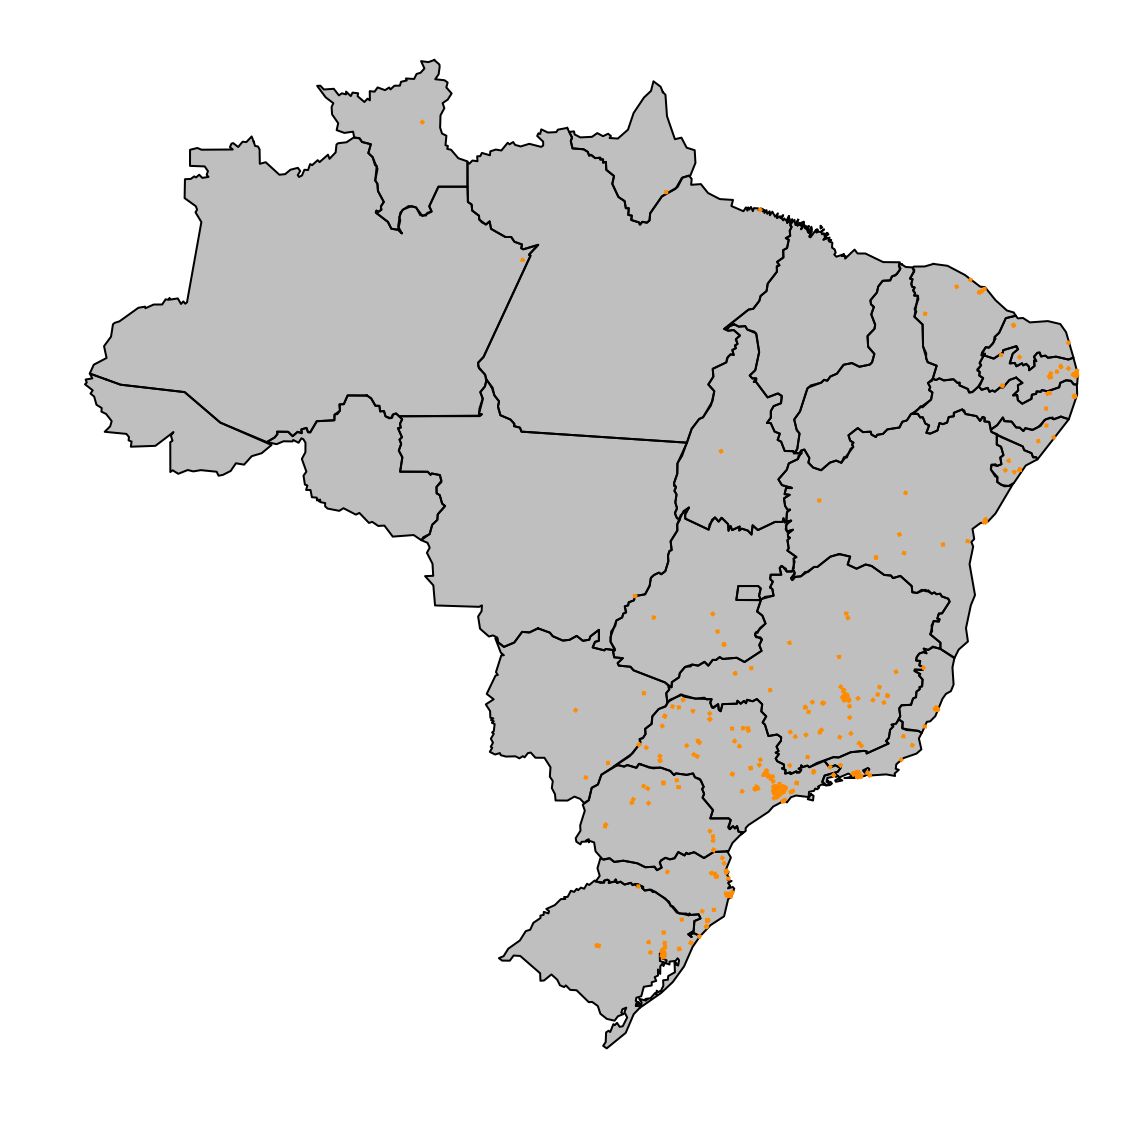

In [44]:
# Victims
ax = brazil.plot(figsize=(20,20),color='grey',linewidth=2)
df[df['code'] == '1'].plot(figsize=(20,20),color='darkorange',ax=ax,linewidth=4)
ax.axis('off')

#plt.savefig("victim.png", transparent=True)

(-75.950328218749931,
 -32.833006724249927,
 -35.7019245756914,
 7.215118104451844)

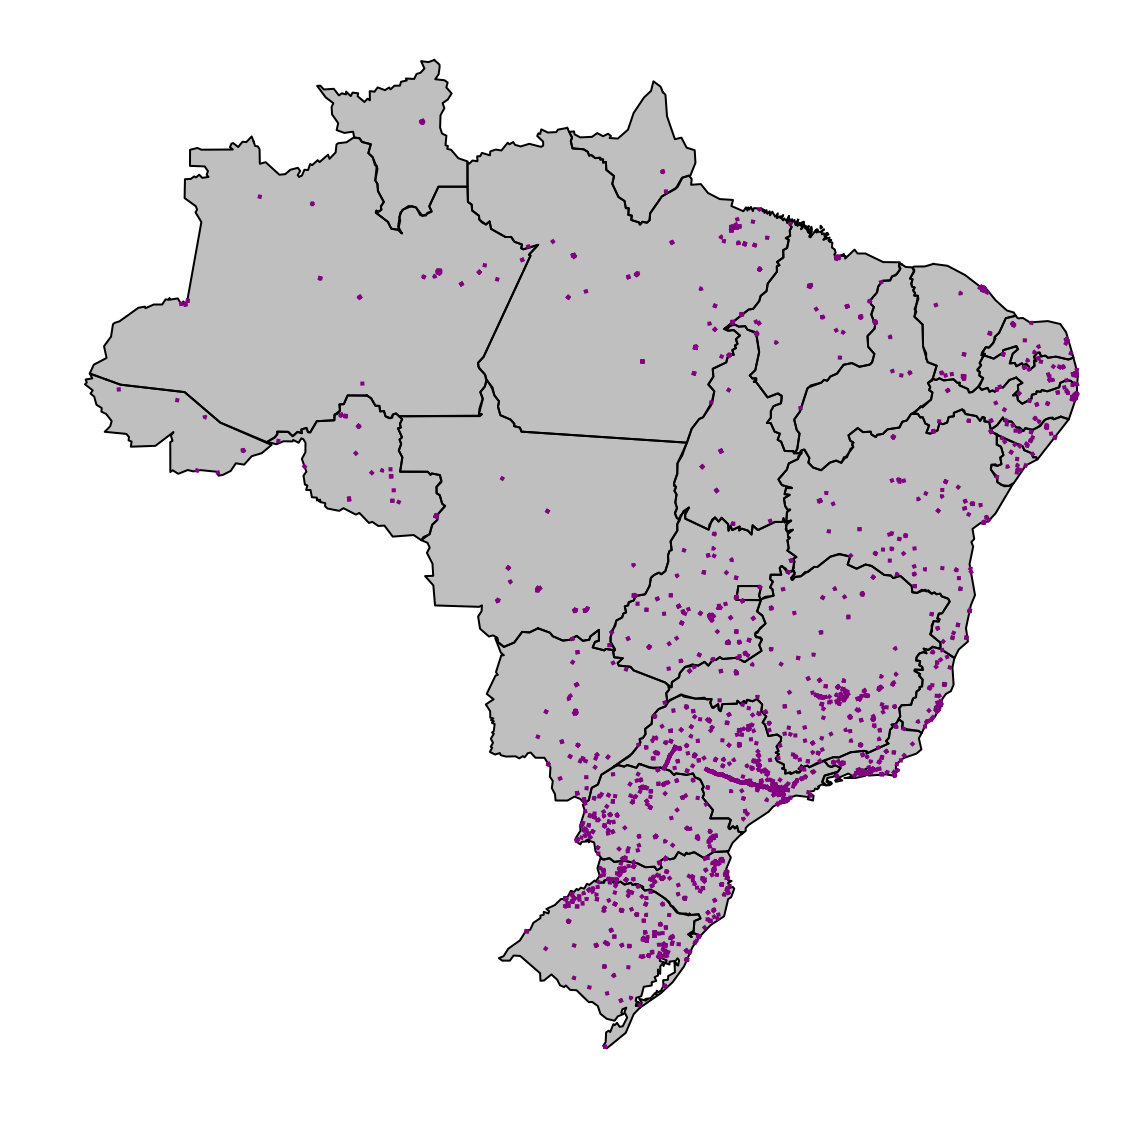

In [43]:
# Criminals
ax = brazil.plot(figsize=(20,20),color='grey',linewidth=2)
df[df['code'] == '2'].plot(figsize=(20,20),color='purple',ax=ax,linewidth=4)
ax.axis('off')

#plt.savefig("criminal.png", transparent=True)